In [3]:
from datetime import datetime
import time
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#https://finance.yahoo.com/quote/BTC-USD/history?
# period1=1413417600&
# period2=1700092800&
# interval=1d&filter=history&frequency=1d

In [4]:
def construct_download_url(
    ticker,
    period1,
    period2,
    interval = 'daily'
):
    
    """
    :period1 & period2: "yyyy-mm-dd"
    :interval: {daily, weekly, monthly}
    """
    def convert_to_seconds(period):
        datetime_value = datetime.strptime(period, '%Y-%m-%d')
        total_seconds = int(time.mktime(datetime_value.timetuple())) + 86400
        return total_seconds
    
    try:
        interval_reference ={'daily': '1d', 'weekly' : '1wk', 'monthly' : '1mo'}
        _interval = interval_reference.get(interval)
        if _interval is None:
            print('interval code is incorrect')
            return
        
        p1 = convert_to_seconds(period1)
        p2 = convert_to_seconds(period2)
        url = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={p1}&period2={p2}&interval={_interval}&filter=history'
        return url
    
    except Exception as e:
        print(e)
        return

In [9]:
query_url = construct_download_url('BTC-USD', '2017-10-01', '2023-10-01', 'daily')
df = pd.read_csv(query_url)
print(df)

df.set_index('Date', inplace=True)
df.to_csv('Bitcoin Historical Data.cvs')

with open('BTC-USD.json', 'w') as f:
    f.write(json.dumps(df.T.to_dict(), indent=4))

            Date          Open          High           Low         Close  \
0     2017-10-02   4395.810059   4470.229980   4377.459961   4409.319824   
1     2017-10-03   4408.459961   4432.470215   4258.890137   4317.479980   
2     2017-10-04   4319.370117   4352.310059   4210.419922   4229.359863   
3     2017-10-05   4229.879883   4362.640137   4164.049805   4328.410156   
4     2017-10-06   4324.459961   4413.270020   4320.529785   4370.810059   
...          ...           ...           ...           ...           ...   
2187  2023-09-28  26355.812500  27259.500000  26327.322266  27021.546875   
2188  2023-09-29  27024.841797  27225.937500  26721.763672  26911.720703   
2189  2023-09-30  26911.689453  27091.794922  26888.968750  26967.916016   
2190  2023-10-01  26967.396484  28047.238281  26965.093750  27983.750000   
2191  2023-10-02  27976.798828  28494.458984  27347.787109  27530.785156   

         Adj Close       Volume  
0      4409.319824   1431730048  
1      4317.479980 

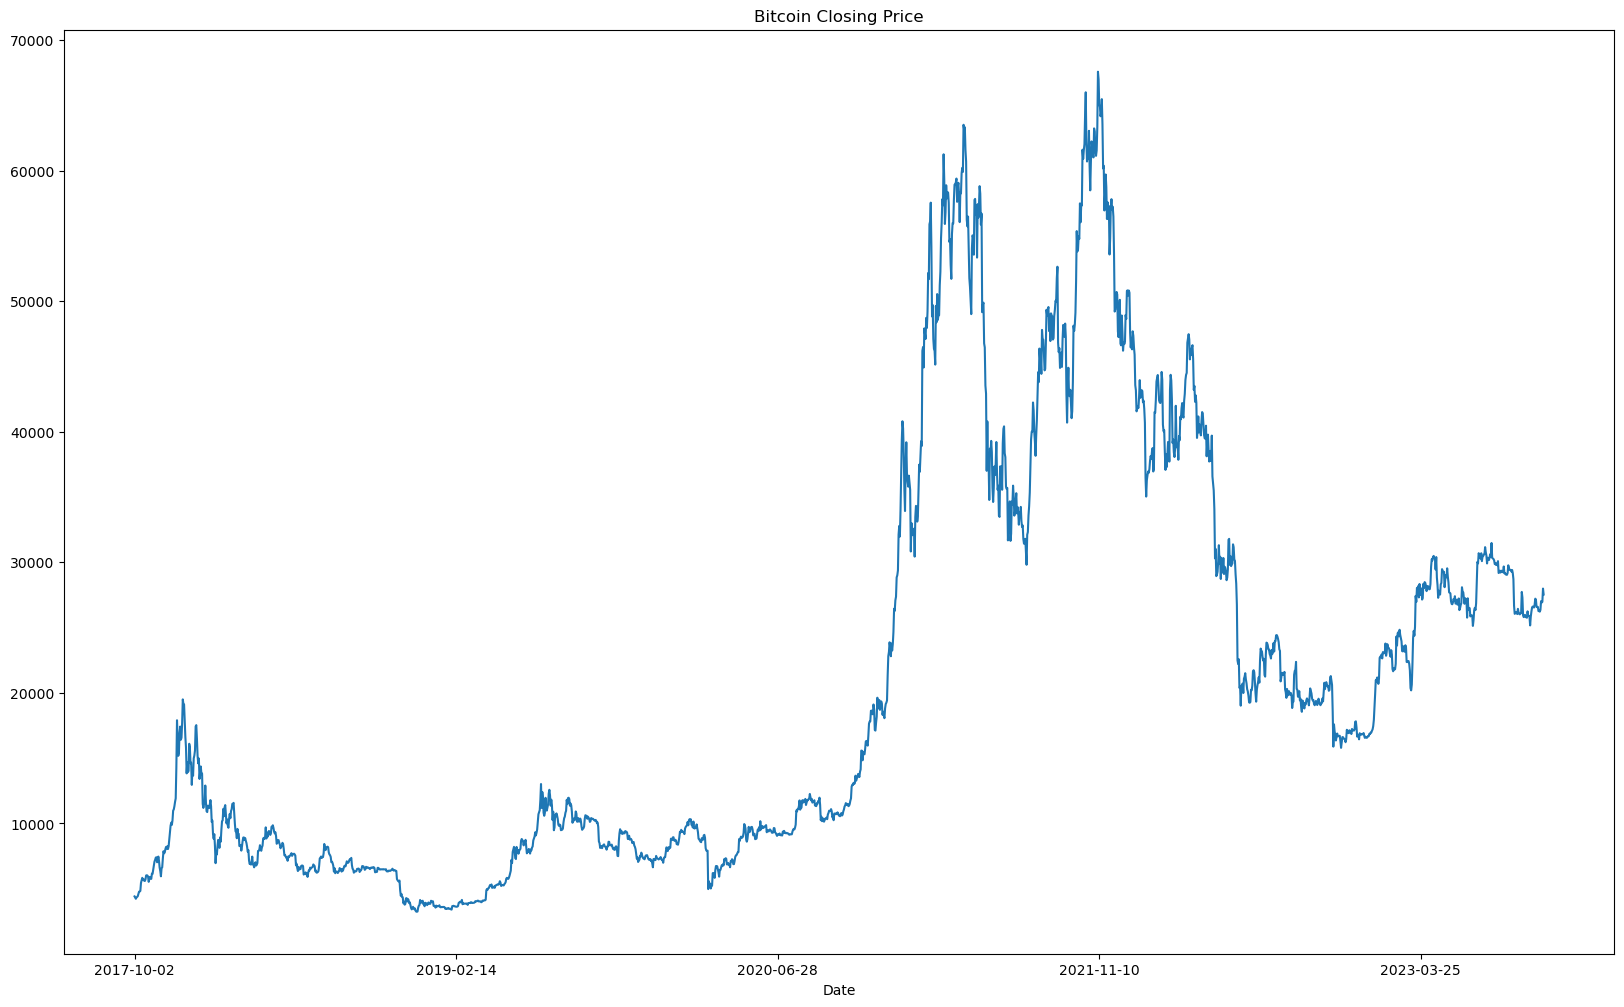

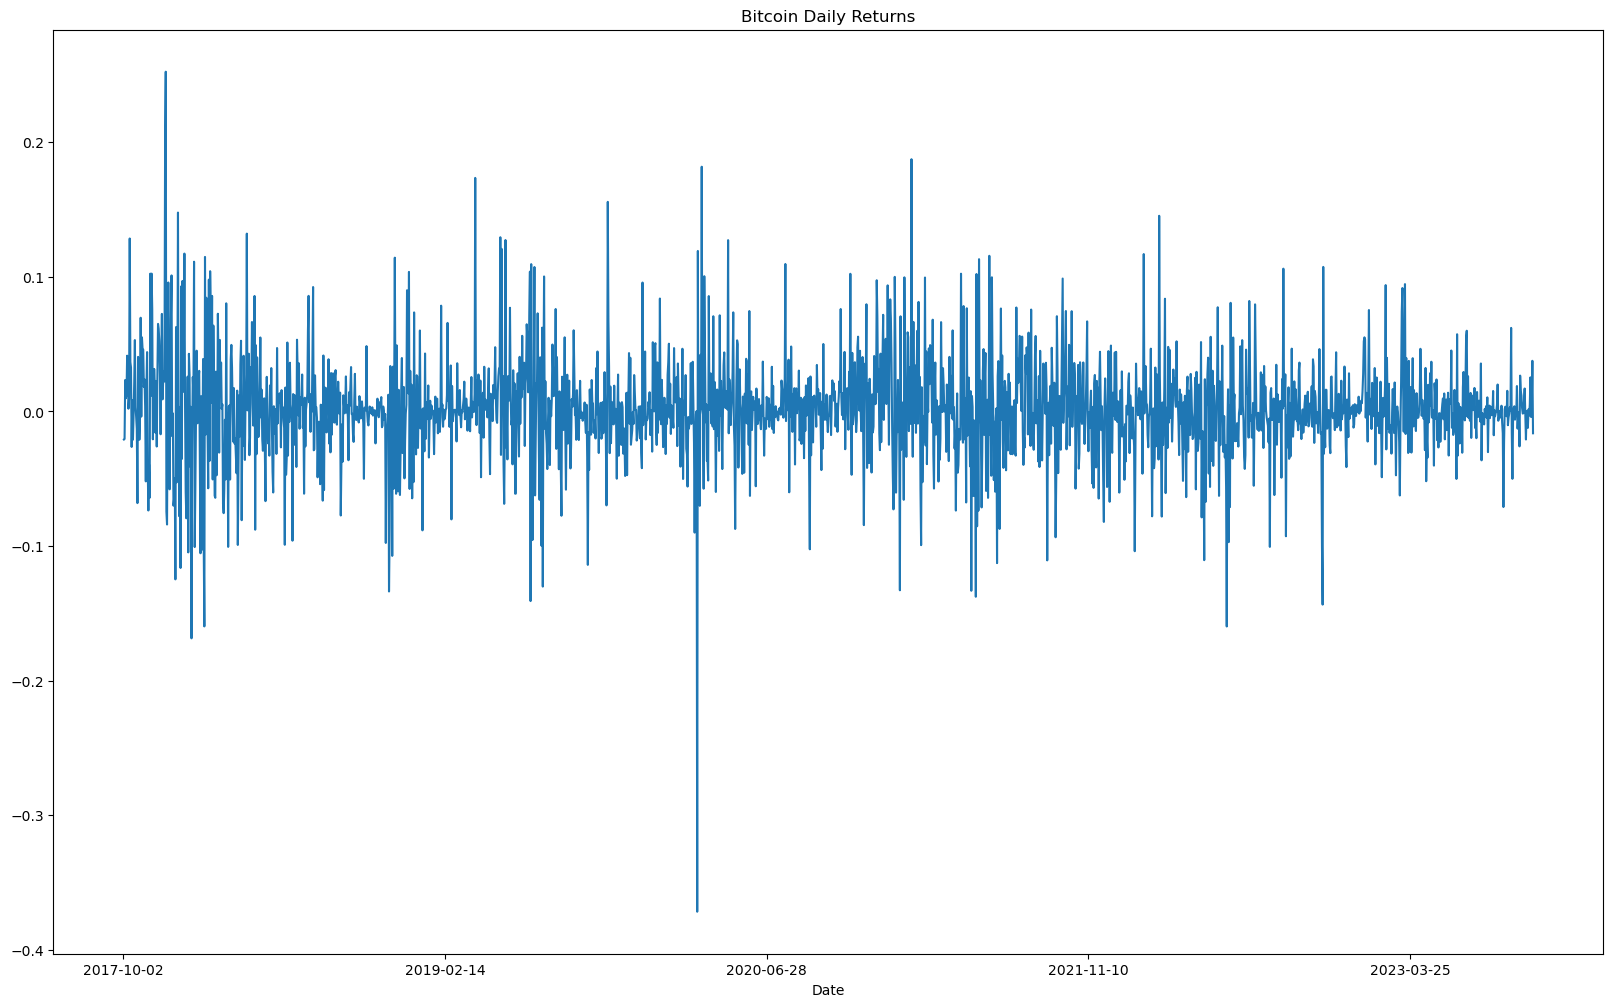

In [12]:
# Calculate daily returns
df['Daily_Return'] = df['Close'].pct_change()

# Calculate annualized volatility
annualized_volatility = df['Daily_Return'].std() * np.sqrt(252)

# Plotting the closing price
plt.figure(figsize=(20, 12))
df['Close'].plot(title='Bitcoin Closing Price')
plt.show()

# Plotting the daily returns
plt.figure(figsize=(20, 12))
df['Daily_Return'].plot(title='Bitcoin Daily Returns')
plt.show()


In [14]:
# Assuming 'Daily_Return' is already calculated
# Calculate daily volatility (standard deviation of daily returns)
daily_volatility = df['Daily_Return'].std()

# Annualize the daily volatility
annualized_volatility = daily_volatility * np.sqrt(252)  # 252 trading days in a year

# Print the annualized volatility
print("Annualized Volatility of Bitcoin:", annualized_volatility)
print("Annualized Volatility of Bitcoin Percentage: {:.2f}%".format(annualized_volatility * 100))

Annualized Volatility of Bitcoin: 0.6055321516759605
Annualized Volatility of Bitcoin Percentage: 60.55%


In [16]:
# Calculate the average of the daily returns
average_daily_return = df['Daily_Return'].mean()

# Annualize the average daily return
# There are approximately 252 trading days in a year
average_annual_return = np.power(1 + average_daily_return, 252) - 1

# Print the average annual return
print("Average Annual Return of Bitcoin:", average_annual_return)
print("Average Annual Return of Bitcoin Percentage: {:.2f}%".format(average_annual_return * 100))


Average Annual Return of Bitcoin: 0.48514883221701766
Average Annual Return of Bitcoin Percentage: 48.51%
